- Kapustin Yaromir
- 19.02.2023
- v0.1

### Провести обучение сети на наборе данных notMNIST_small

In [1]:
import os
from PIL import Image, ImageFilter

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, CategoryEncoding, Dropout

In [2]:
labels = os.listdir(r'notMNIST_small')

In [3]:
directory = r'notMNIST_small'

In [4]:
X = [] 
y = []

for label in labels: 
    path = os.path.join(directory, label)
    for img in os.listdir(path):
        try:
            img_arr = Image.open(os.path.join(path, img))
            X.append(np.asarray(img_arr, dtype = np.float32))
            y.append(label)
        except:
            continue
            
X = np.asarray(X)
y = np.asarray(y)

In [5]:
X.shape

(18724, 28, 28)

In [6]:
y.shape

(18724,)

In [7]:
# Преобразование меток классов в массив
encoding = CategoryEncoding(num_tokens=10, output_mode="one_hot")
y = encoding (LabelEncoder().fit_transform(y)).numpy()

In [8]:
y.shape

(18724, 10)

In [9]:
# Нормализация данных
X = X/255

# Разбиение на тестовую и тренировочную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.Nadam(learning_rate=0.0005), 
              metrics=['categorical_accuracy'])


callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_categorical_accuracy',
        min_delta=1e-3,
        patience=5,
        verbose=1)
]


history = model.fit(X_train, y_train, batch_size=256, epochs=50,
                        callbacks=callbacks, 
                        validation_split=0.3, 
                        verbose=1)

Epoch 1/50
36/36 [==============================] - 8s 167ms/step - loss: 1.1908 - categorical_accuracy: 0.6476 - val_loss: 0.6133 - val_categorical_accuracy: 0.8423
Epoch 2/50
36/36 [==============================] - 6s 159ms/step - loss: 0.5701 - categorical_accuracy: 0.8451 - val_loss: 0.4499 - val_categorical_accuracy: 0.8678
Epoch 3/50
36/36 [==============================] - 6s 163ms/step - loss: 0.4537 - categorical_accuracy: 0.8737 - val_loss: 0.3862 - val_categorical_accuracy: 0.8833
Epoch 4/50
36/36 [==============================] - 6s 164ms/step - loss: 0.3871 - categorical_accuracy: 0.8898 - val_loss: 0.3532 - val_categorical_accuracy: 0.8967
Epoch 5/50
36/36 [==============================] - 6s 160ms/step - loss: 0.3507 - categorical_accuracy: 0.8985 - val_loss: 0.3254 - val_categorical_accuracy: 0.9064
Epoch 6/50
36/36 [==============================] - 6s 165ms/step - loss: 0.3182 - categorical_accuracy: 0.9071 - val_loss: 0.3019 - val_categorical_accuracy: 0.9115
Epoc

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dropout (Dropout)           (None, 3200)              0

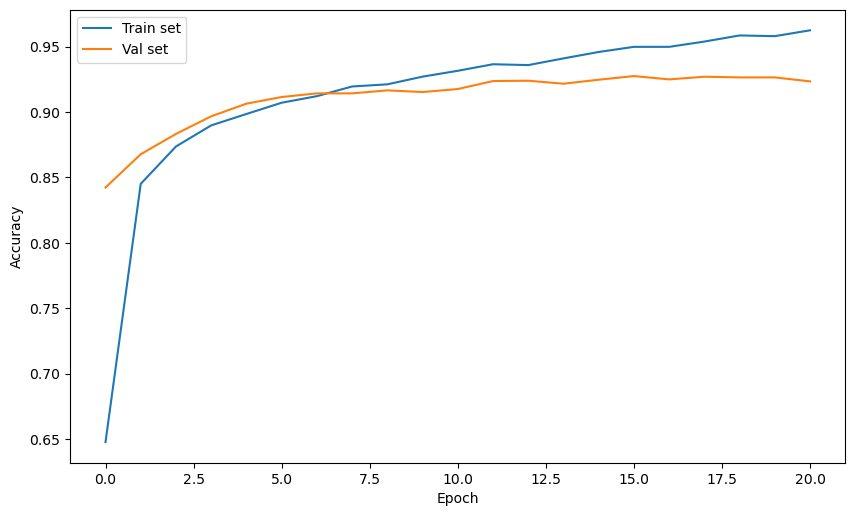

In [13]:
figure(figsize=(10, 6), dpi=100)
plt.plot(history.history['categorical_accuracy'], label='Train set')
plt.plot(history.history['val_categorical_accuracy'], label='Val set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
scores = model.evaluate(X_val, y_val, verbose=0)
print("Точность на тестовых данных: %.4f" % scores[1])

Точность на тестовых данных: 0.9322
